### ML_group_4
* Aleksander Augustyniak
* Adrian Eidsnes Phillips
* Karl Kristen Gjølsjø

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# lists the files in the folder
import os
print(os.listdir("./data"))

['competition_predictions.csv', 'forest_model.pkl', 'linear_model.pkl', 'sample_submission.csv', 'test.csv', 'train.csv', 'tree_model.pkl']


In [114]:
train = pd.read_csv("./data2/train.csv")
test = pd.read_csv("./data2/test.csv")
sampleSubmission = pd.read_csv("./data2/sample_submission.csv")

# 1. Frame the problem and look at the big picture

Framing the problem should consist of getting the basic idea: what's my role in the project. This stage requires to think about what model should be used and generally what should it be used for, also how much time is required to spend to tune the model.

The *California Housing* data set looks like a regression task rather than a classifying, because the goal is to predict some value. The data set is not changing in time, so the best approach is to train the future model as if it was an offline/batch learning. 

When it comes to regression tasks, the best performance measurement is provided by RMSE – Root Mean Squared Error. The bigger error, the worse performance it gives. That performance measure is highly effective because of its ability to detect outliers is incredible.

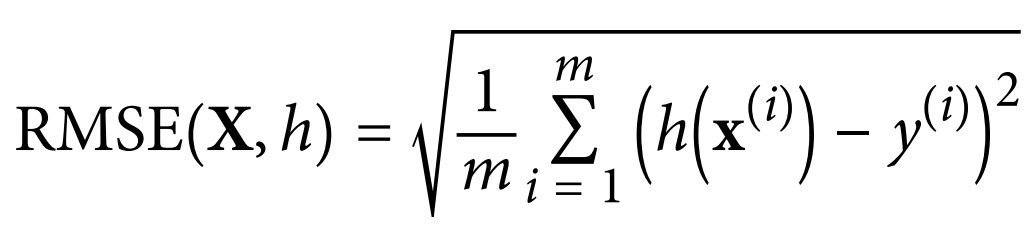

m – number of instances in a dataset\
$\mathbf{x}^{(i)}$ – vector of all instance's features, where $(i)$ – $i$*th* instance of a dataset\
$y^{(i)}$ – output value matching its $i$*th* instance\
$\mathbf{X}$ – matrix with all the features without labels\
$h(\mathbf{x}^{(i)})$ (*hypothesis*) – system's prediction function; it's output value is a prediction of the given vector $\mathbf{x}^{(i)}$

# 2. Get the data

The dataset is a .csv file – comma-separated values. It is available in *sklearn.datasets.fetch_california_housing*.

# 3. Explore the data to gain insights

The environment being used for the assignment is Python, including couple of libraries, such as: NumPy, Pandas, Matplotlib, Scikit-Learn.

There are few methods, which using helps to have more understandment of the dataset.

In [77]:
# head method – shows first 5 rows od dataframe
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [78]:
# info method – shows data types of each column's values, number of rows and columns, and memory usage
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [79]:
# describe method – shows some statistical measures of values of each column in dataframe like: count, mean, standard deviation
# and quantiles
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


It's clearly visible that there is a lack of some values (total_bedrooms).

The *California Housing* data set consists of few columns with numerical values and one column which values are non-numerical. Rows (*instances*) represents each district and columns (*features*) represents the values describing instances (in this case districts).

To be able to see more clearly how values of different instances reacts within a feature, we can use *hist* method. 

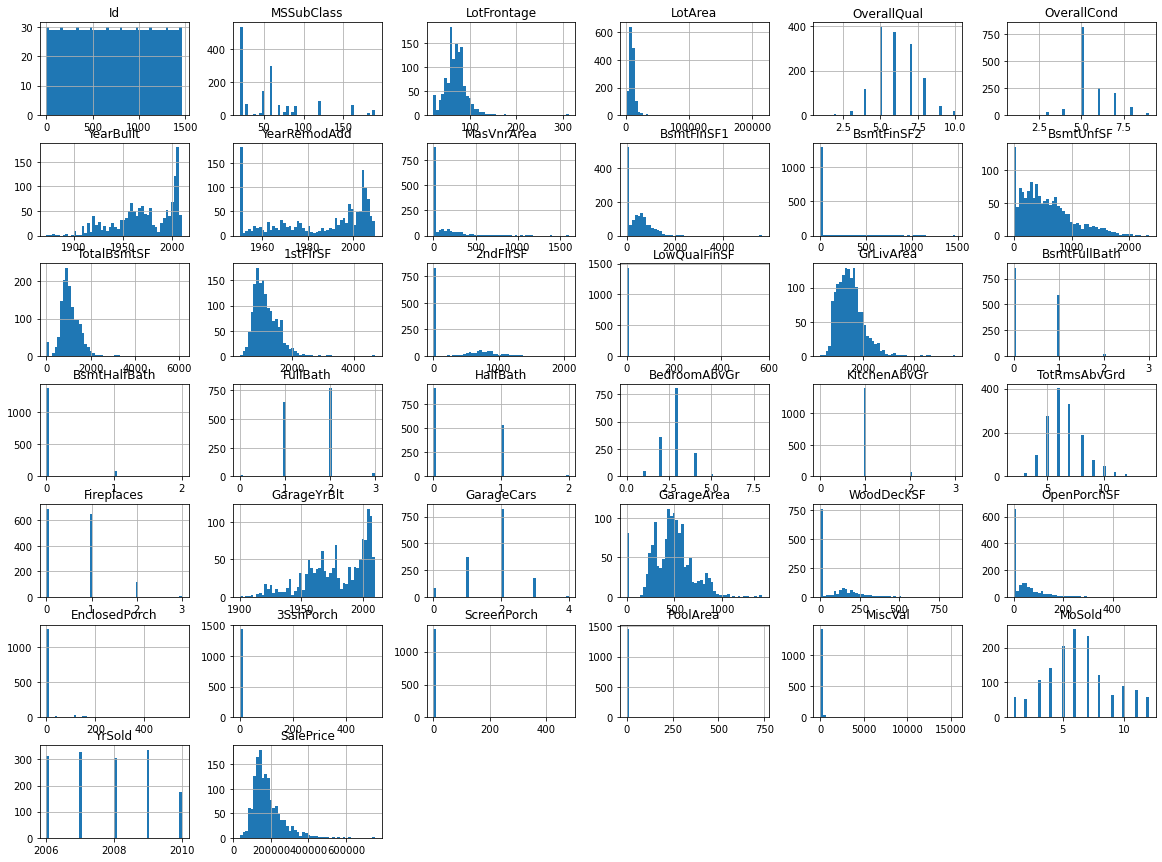

In [80]:
train.hist(bins=50, figsize=(20, 15))
plt.show()

We can see that there is something odd going on in some of the histograms, *housing_median_age* shows that houses older than 50 years are being plotted into one value and also *median_house_value* has such of a problem. It is treated as an issue and there should be done something about it to make the model efficient.

## Splitting data into two subsets

The data set is already splitted into two subsets: *training* and *test* one.

If we had a whole data set in one file, we could run these methods: 

In [81]:
# # other 20% = test set
# test_subset = train.iloc[int(len(train)*0.8):]

# # first 80% = training set
# train = train.iloc[:int(len(train)*0.8)]

## Visualizing the data

VIsualizing the data helps getting even more understanding of the data.

One of the methods is to represent the data on the **scatter plot**, which could be crucial, if the price would be strongly dependent on the house location. This kind of visualizing data should not be omitted.

In [82]:
# train.plot(kind="scatter", x="longitude", y="latitude", s=train["population"]/100,
#            label="population", alpha=0.3, figsize=(15,5), c="median_house_value", cmap=plt.get_cmap("plasma"))
# plt.legend()

Colors in the plot represents a level of population in the certain areas.\
Purple color stands for least populated areas and orange, yellow stands for most populated ones.

Another way to have a better insight of what is in the data set exactly is to create **correlation plots** or **correlation matrices**.

In [83]:
# corr_matrix = train.corr()

# looking for correlation between median_house_value and other values
# corr_matrix["median_house_value"].sort_values(ascending=False)

In [84]:
# from pandas.plotting import scatter_matrix
# attributes = [ "median_income",
#               "total_rooms", "housing_median_age"]
# scatter_matrix(train[attributes], figsize=(12, 8))

The main diagonal line in the plot represents correlation of features to its own values, so it is not that important. More valuable plots are these, whose values approximations resemble linear functions (e.g. *median_house_value*, *median_income*) or have some pattern.

# 4. Prepare the data to better expose the underlying data patterns to machine learning algorithms

$$\huge{z=\frac{(x-\mu)}{\sigma}}$$ \
$x$ — independent value (data value)\
$\mu$ — mean\
$\sigma$ — standard deviation\
$z$ — score of a data value\

When a z-score value is lower than 3, we remove such an instance from the data set.

In [85]:
train_labels = train["SalePrice"].copy()
train = train.drop("SalePrice", axis=1)

The earlier lack of some values in *total_bedrooms* feature could be fixed with the help of *SimpleImputer* – the *sklearn*'s class for handling that kind of issues.

In [86]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

The *imputer* object will fill all the missing values with their proper median.

## Getting rid of non-numerical and missing values

The next important step is to properly handle non-numerical, object values. Our data set has one. We will define another dataframe, which is copy of *train* dataframe and drop column which has non-numerical values.

In [87]:
train_numerical = train.copy()
obj_labels = []
for col in train_numerical.select_dtypes(include='object'):
    obj_labels.append(col)
obj_labels.append('Id')
train_numerical = train_numerical.drop(columns=obj_labels)    
print(train_numerical.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

*Feeding* the imputer instance to compute the median value of each feature.

In [88]:
imputer.fit(train_numerical)

SimpleImputer(strategy='median')

Looking at the values.

In [89]:
imputer.statistics_

array([5.0000e+01, 6.9000e+01, 9.4785e+03, 6.0000e+00, 5.0000e+00,
       1.9730e+03, 1.9940e+03, 0.0000e+00, 3.8350e+02, 0.0000e+00,
       4.7750e+02, 9.9150e+02, 1.0870e+03, 0.0000e+00, 0.0000e+00,
       1.4640e+03, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
       3.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00, 1.9800e+03,
       2.0000e+00, 4.8000e+02, 0.0000e+00, 2.5000e+01, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00,
       2.0080e+03])

In [90]:
train_numerical.median().values

array([5.0000e+01, 6.9000e+01, 9.4785e+03, 6.0000e+00, 5.0000e+00,
       1.9730e+03, 1.9940e+03, 0.0000e+00, 3.8350e+02, 0.0000e+00,
       4.7750e+02, 9.9150e+02, 1.0870e+03, 0.0000e+00, 0.0000e+00,
       1.4640e+03, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
       3.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00, 1.9800e+03,
       2.0000e+00, 4.8000e+02, 0.0000e+00, 2.5000e+01, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00,
       2.0080e+03])

Replacing missing values.

In [91]:
train_transformed = pd.DataFrame(imputer.transform(train_numerical),
                       columns=train_numerical.columns)

## Handling categorical values

To handle categorical values, we use *OrdinalEncoder* class instance, which maps a category into some numerical value.

In [92]:
# train_categories
# train_categories = train[["ocean_proximity"]]

train_categories = train.copy()
num_labels = []
for col in train_categories.select_dtypes(include=['int64', 'float64']):
    num_labels.append(col)
train_categories = train_categories.drop(columns=num_labels)    
print(train_categories.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [93]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [94]:
# ordinal_encoder.fit_transform(train_categories)
train_categories2 = train_categories.copy()
train_categories2 = train_categories2.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])
train_categories2 = train_categories2.dropna()
print(train_categories2.isnull().sum())
# train_categories_encoded = ordinal_encoder.fit_transform(train_categories)

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64


In [95]:
# ordinal_encoder.categories_

The next step is to use *OneHotEncoder* to create one binary attribute per category. It results in creating a matrix, which width is equal to the number of categories and height is equal to the number of dataset's instances. Each instance will have a category feature represented by a vector, where the value *one* represents actual encoded category.

In [96]:
from sklearn.preprocessing import OneHotEncoder
categories_encoder = OneHotEncoder()
train_categories_1hot = categories_encoder.fit_transform(train_categories2)
train_categories_1hot

<1338x229 sparse matrix of type '<class 'numpy.float64'>'
	with 50844 stored elements in Compressed Sparse Row format>

## Creating custom transformers

We will write a custom class, which allows including some optional hyperparameter or few. In this case the class will have a hyperparameter *add_bedrooms_per_room*. 

In [97]:
from sklearn.base import BaseEstimator, TransformerMixin

# no additional hyperparameters
# rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, Y=None):
        return self
    def transform(self, X, y=None):
        return X

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
train_extra = attr_adder.transform(train.values)

## Creating transformation pipeline

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    # ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])
train_numerical_transformed = num_pipeline.fit_transform(train_numerical)

1. Filling missing values by a median value
2. Adding more features to the set using already prepared data
3. Standardizing the values using z-score technique (StandardScaler)

$$\huge{z=\frac{(x-\mu)}{\sigma}}$$ \
$x$ — independent value (data value)\
$\mu$ — mean\
$\sigma$ — standard deviation\
$z$ — score of a data value\

If a z-score value is lower than some treshold (usually 2/3), we remove such an instance from the data set.

## Creating a pipeline for both numerical and categorical values

In [99]:
from sklearn.compose import ColumnTransformer

# getting lists of attributes of two sets (numerical and categorical)
numerical_attributes = list(train_numerical)
categories_attributes = obj_labels

# creating a final pipeline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, numerical_attributes),
    ("cat", OneHotEncoder(), categories_attributes)
])

# using the pipeline to prepare the data set
train_prepared = full_pipeline.fit_transform(train)

In [100]:

# print(len(obj_labels))
# print(len(num_labels))
# len(numerical_attributes)
len(train.columns)

80

# 5. Explore many different models and short-list the best ones

There are few regression models: *LinearRegression*, *DecisionTreeRegressor*, *RandomForestRegressor*...

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

___
...and some tools to test their efficiency (also called *score*): Solving *RMSE* equation (already mentioned), splitting data into *k*-folds.

In [102]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [30]:
# linear regression model – training
lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_labels)

LinearRegression()

In [31]:
# linear regression model – measurement
lin_reg_predictions = lin_reg.predict(train_prepared)
lin_rmse = np.sqrt(mean_squared_error(train_labels, lin_reg_predictions))
lin_rmse

0.16602498185998826

There is a tendency to overfit the provided data. We are using another model.
___

In [32]:
# tree regression model – training
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_prepared, train_labels)

DecisionTreeRegressor()

In [33]:
# tree regression model – measurement
tree_reg_predictions = tree_reg.predict(train_prepared)
tree_rmse = np.sqrt(mean_squared_error(train_labels, tree_reg_predictions))
tree_rmse

0.0

This model is overfitting the data. We are trying with another model and methodology.
___

To be completely sure, we will use cross valuation scores method. We will run couple of machine model predictions and count a mean and standard deviation from these series using simple function.

In [34]:
def cv_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [35]:
# cross valuation scores
tree_scores = cross_val_score(tree_reg, train_prepared, train_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

In [36]:
# scores for tree regression model
cv_scores(tree_rmse_scores)

Scores: [35784.55805749 41342.74635596 33655.19097049 41767.59331682
 39537.54455768 28317.64976039 31082.11219529 32554.16892384
 54271.77150806 42198.73587107]
Mean: 38051.207151709954
Standard deviation: 7107.41983791949


In [37]:
# scores for linear regression model using cross valuation method
lin_scores = cross_val_score(lin_reg, train_prepared, train_labels, scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
cv_scores(lin_rmse_scores)

Scores: [20849.65454296 26622.42442629 25288.07927334 39574.39827366
 31344.0720289  29667.55258303 25674.10549302 24284.77063911
 62711.59619932 24735.78570904]
Mean: 31075.243916868214
Standard deviation: 11612.49922288038


In [38]:
# scores for random forest regression model
forest_reg = RandomForestRegressor()
forest_reg.fit(train_prepared, train_labels)

RandomForestRegressor()

In [39]:
# valuating a forest regression model
forest_scores = cross_val_score(forest_reg, train_prepared, train_labels, scoring="neg_mean_squared_error", cv=2)

forest_rmse_scores = np.sqrt(-forest_scores)
cv_scores(forest_rmse_scores)

Scores: [31981.39525254 30555.84760531]
Mean: 31268.621428928305
Standard deviation: 712.7738236139521


## Saving models into files

In [40]:
import joblib

# linear regression model
joblib.dump(lin_reg, "./data2/linear_model.pkl")

# tree regression model
joblib.dump(tree_reg, "./data2/tree_model.pkl")

# random forest regression model
joblib.dump(forest_reg, "./data2/forest_model.pkl")

['./data2/forest_model.pkl']

In [103]:
import joblib

lin_reg = joblib.load("./data2/linear_model.pkl")

tree_reg = joblib.load("./data2/tree_model.pkl")

forest_reg = joblib.load("./data2/forest_model.pkl")

# 6. Fine-tune your models and combine them into a great solution

We use GridSearchCV to look for the best permutation of numbers of estimators and features. The class chooses the best model and lets us to use it to predict the output on a *test* set.

In [104]:
from sklearn.model_selection import GridSearchCV

params_grid = [
    {"n_estimators": [3, 10, 30, 50], "max_features": [2, 4, 6, 10, 13]},
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, params_grid, cv = 5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(train_prepared, train_labels)

grid_search.best_params_

{'max_features': 13, 'n_estimators': 50}

In [105]:
feature_importances = grid_search.best_estimator_.feature_importances_
# extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = numerical_attributes + cat_one_hot_attribs # + extra_attribs

# IT SHOULD WORK (?)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.04110541515803148, 'GarageArea'),
 (0.03470101602800663, 'GarageCars'),
 (0.033057708432580206, 'BsmtFinSF1'),
 (0.02721075342039054, 'OverallQual'),
 (0.024544788407865704, 'GrLivArea'),
 (0.022917263323522123, 'TotalBsmtSF'),
 (0.02128144022355259, 'TotRmsAbvGrd'),
 (0.02115694802538776, 'FullBath'),
 (0.0210196703785576, 'YearBuilt'),
 (0.018441315530141514, 'LotArea'),
 (0.017695058686041973, 'MasVnrArea'),
 (0.017135026051334525, 'YearRemodAdd'),
 (0.016950078936550445, '1stFlrSF'),
 (0.016003232570424984, '2ndFlrSF'),
 (0.015602493990148777, 'Fireplaces'),
 (0.015072050683800981, 'GarageYrBlt'),
 (0.013250725004507207, 'LotFrontage'),
 (0.010808509022263086, 'BsmtUnfSF'),
 (0.010703409054037051, 'WoodDeckSF'),
 (0.010180347142023514, 'OpenPorchSF'),
 (0.008611158500676406, 'RM'),
 (0.007162069600281961, 'OverallCond'),
 (0.006788484019619881, 'MSSubClass'),
 (0.006278673700132336, 'BedroomAbvGr'),
 (0.005539134906207341, 'MoSold'),
 (0.00477725595535469, 'YrSold'),
 (0.004196

In [106]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

46138.244434306696 {'max_features': 2, 'n_estimators': 3}
41052.62275136924 {'max_features': 2, 'n_estimators': 10}
38543.52932458505 {'max_features': 2, 'n_estimators': 30}
38658.60229174319 {'max_features': 2, 'n_estimators': 50}
47419.04628708823 {'max_features': 4, 'n_estimators': 3}
41730.63780540245 {'max_features': 4, 'n_estimators': 10}
39277.246497672764 {'max_features': 4, 'n_estimators': 30}
37759.03752613695 {'max_features': 4, 'n_estimators': 50}
46228.07123546573 {'max_features': 6, 'n_estimators': 3}
40688.31242784339 {'max_features': 6, 'n_estimators': 10}
38759.362868227516 {'max_features': 6, 'n_estimators': 30}
38480.58012945393 {'max_features': 6, 'n_estimators': 50}
47923.433677416244 {'max_features': 10, 'n_estimators': 3}
39386.74792090896 {'max_features': 10, 'n_estimators': 10}
38487.06131691766 {'max_features': 10, 'n_estimators': 30}
36796.22164844702 {'max_features': 10, 'n_estimators': 50}
46740.0625412395 {'max_features': 13, 'n_estimators': 3}
40162.08285

In [107]:
print(test)


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

# 7. Present your solution

In [108]:
print(test)
print(full_pipeline)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

In [109]:
print(test.columns)
print(train.columns)
print(test)
print(train)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [113]:

final_model = grid_search.best_estimator_

X_test = test
X_test = X_test.drop("Id", axis=1)


X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_data = pd.DataFrame({"Id": test["Id"], "SalePrice": final_predictions})
final_data.to_csv("./data2/competition_predictions.csv", index=False)

ValueError: X has 79 features, but ColumnTransformer is expecting 80 features as input.

# 8. Launch, monitor and maintain your system